# **Homework 5 - USA Airport Flight Analysis**

## Importing necessary libraries

In [1]:
import numpy as np 
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

import functions.analysis as analysis
import functions.summarize as summarize

## 1. Flight Network Analysis (Q1)

### Basic analysis

In [2]:
# Loading dataset
df = pd.read_csv("Airports2.csv")
df

,Origin_airport,Destination_airport,Origin_city,Destination_city,Passengers,Seats,Flights,Distance,Fly_date,Origin_population,Destination_population,Org_airport_lat,Org_airport_long,Dest_airport_lat,Dest_airport_long
0,MHK,AMW,"Manhattan, KS","Ames, IA",21,30,1,254,2008-10-01,122049,86219,39.140999,-96.670799,NaN,NaN
1,EUG,RDM,"Eugene, OR","Bend, OR",41,396,22,103,1990-11-01,284093,76034,44.124599,-123.211998,44.254101,-121.150002
2,EUG,RDM,"Eugene, OR","Bend, OR",88,342,19,103,1990-12-01,284093,76034,44.124599,-123.211998,44.254101,-121.150002
3,EUG,RDM,"Eugene, OR","Bend, OR",11,72,4,103,1990-10-01,284093,76034,44.124599,-123.211998,44.254101,-121.150002
4,MFR,RDM,"Medford, OR","Bend, OR",0,18,1,156,1990-02-01,147300,76034,42.374199,-122.873001,44.254101,-121.150002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3606798,STL,TBN,"St. Louis, MO","Fort Leonard Wood, MO",281,969,51,119,2009-02-01,2828990,46457,38.748699,-90.370003,37.741600,-92.140701
3606799,STL,TBN,"St. Louis, MO","Fort Leonard Wood, MO",245,1026,54,119,2009-11-01,2828990,46457,38.748699,-90.370003,37.741600,-92.140701
3606800,STL,TBN,"St. Louis, MO","Fort Leonard Wood, MO",363,1273,67,119,2009-08-01,2828990,46457,38.748699,-90.370003,37.741600,-92.140701
3606801,CGI,TBN,"Cape Girardeau, MO","Fort Leonard Wood, MO",2,19,1,146,2009-08-01,93712,46457,37.225300,-89.570801,37.741600,-92.140701


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3565050 entries, 0 to 3606802
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Origin_airport          object 
 1   Destination_airport     object 
 2   Origin_city             object 
 3   Destination_city        object 
 4   Passengers              int64  
 5   Seats                   int64  
 6   Flights                 int64  
 7   Distance                int64  
 8   Fly_date                object 
 9   Origin_population       int64  
 10  Destination_population  int64  
 11  Org_airport_lat         float64
 12  Org_airport_long        float64
 13  Dest_airport_lat        float64
 14  Dest_airport_long       float64
dtypes: float64(4), int64(6), object(5)
memory usage: 435.2+ MB


In [15]:
df.describe()

,Passengers,Seats,Flights,Distance,Origin_population,Destination_population,Org_airport_lat,Org_airport_long,Dest_airport_lat,Dest_airport_long
count,3.565050e+06,3.565050e+06,3.565050e+06,3.565050e+06,3.565050e+06,3.565050e+06,3.558466e+06,3.558466e+06,3.558555e+06,3.558555e+06
mean,2.720375e+03,4.095619e+03,3.760448e+01,6.954350e+02,5.864580e+06,5.889934e+06,3.772410e+01,-9.176235e+01,3.771923e+01,-9.174049e+01
std,4.363210e+03,6.221537e+03,4.977841e+01,5.995712e+02,7.833335e+06,7.884462e+06,5.720273e+00,1.643580e+01,5.702781e+00,1.638317e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.300500e+04,1.288700e+04,1.972140e+01,-1.579220e+02,1.972140e+01,-1.579220e+02
25%,1.150000e+02,1.730000e+02,2.000000e+00,2.740000e+02,1.035566e+06,1.029829e+06,3.363670e+01,-9.703800e+01,3.363670e+01,-9.703800e+01
50%,1.161000e+03,2.074000e+03,2.500000e+01,5.180000e+02,2.404337e+06,2.404337e+06,3.885210e+01,-8.741280e+01,3.885210e+01,-8.775240e+01
75%,3.541000e+03,5.442000e+03,5.500000e+01,9.260000e+02,8.613622e+06,8.635706e+06,4.173260e+01,-8.029060e+01,4.173260e+01,-8.029060e+01
max,8.959700e+04,1.470620e+05,1.128000e+03,5.095000e+03,3.813959e+07,3.813959e+07,6.483750e+01,-6.882810e+01,6.483750e+01,-6.882810e+01


In [16]:
df.isnull().sum()

Origin_airport               0
Destination_airport          0
Origin_city                  0
Destination_city             0
Passengers                   0
Seats                        0
Flights                      0
Distance                     0
Fly_date                     0
Origin_population            0
Destination_population       0
Org_airport_lat           6584
Org_airport_long          6584
Dest_airport_lat          6495
Dest_airport_long         6495
dtype: int64

In [5]:
df.duplicated().sum()

41753

In [6]:
df = df.drop_duplicates()

### 1.1 Computing function

In [3]:
# Creating the flight network graph
flight_network = nx.DiGraph()
for _, row in df.iterrows():
    flight_network.add_edge(row['Origin_airport'], row['Destination_airport'])

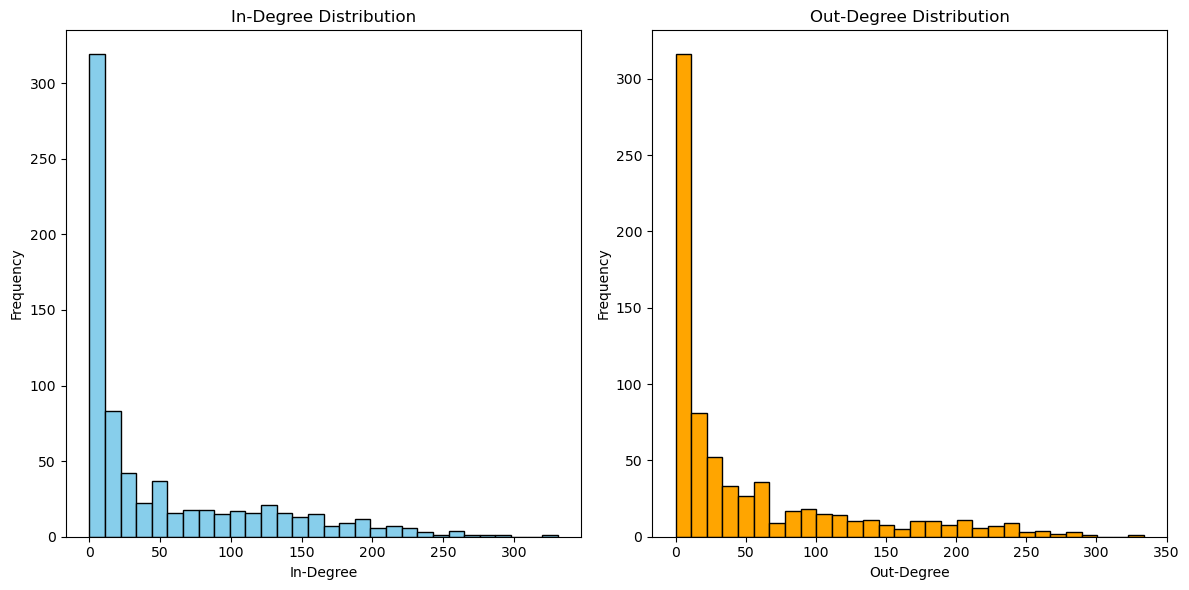

{'num_nodes': 727,
 'num_edges': 36719,
 'density': 0.1391392984490396,
 'in_degree': {'MHK': 96,
  'AMW': 1,
  'EUG': 78,
  'RDM': 54,
  'MFR': 52,
  'SEA': 188,
  'PDX': 158,
  'LMT': 22,
  'SFO': 164,
  'LAX': 207,
  'EAT': 18,
  'YKM': 68,
  'EKO': 150,
  'SLE': 17,
  'GEG': 126,
  'RDD': 49,
  'LWS': 55,
  'AST': 3,
  'CLM': 13,
  'PDT': 15,
  'SJC': 146,
  'ACV': 23,
  'PUW': 48,
  'SMF': 116,
  'FLL': 181,
  'PHX': 225,
  'BFI': 141,
  'GGG': 108,
  'GTF': 89,
  'FAT': 111,
  'TUS': 212,
  'MWH': 56,
  'BIL': 109,
  'DFW': 251,
  'RBG': 5,
  'SLC': 219,
  'CPR': 79,
  'RNO': 159,
  'FBK': 14,
  'ANC': 114,
  'BIF': 79,
  'CIC': 11,
  'SAF': 23,
  'ABQ': 181,
  'FSM': 107,
  'LAS': 227,
  'DQF': 53,
  'ICT': 189,
  'AZA': 74,
  'DLH': 111,
  'CEC': 13,
  'OKC': 241,
  'SAN': 143,
  'STS': 17,
  'DRO': 33,
  'OAK': 173,
  'IAH': 217,
  'ELP': 198,
  'DBQ': 41,
  'HLN': 54,
  'TUL': 186,
  'OMA': 186,
  'ACT': 151,
  'BTM': 20,
  'AUS': 178,
  'PIA': 164,
  'CWA': 80,
  'PUB': 123,

In [4]:
analysis.analyse_graph_features(flight_network)

### 1.2 Summarizing function

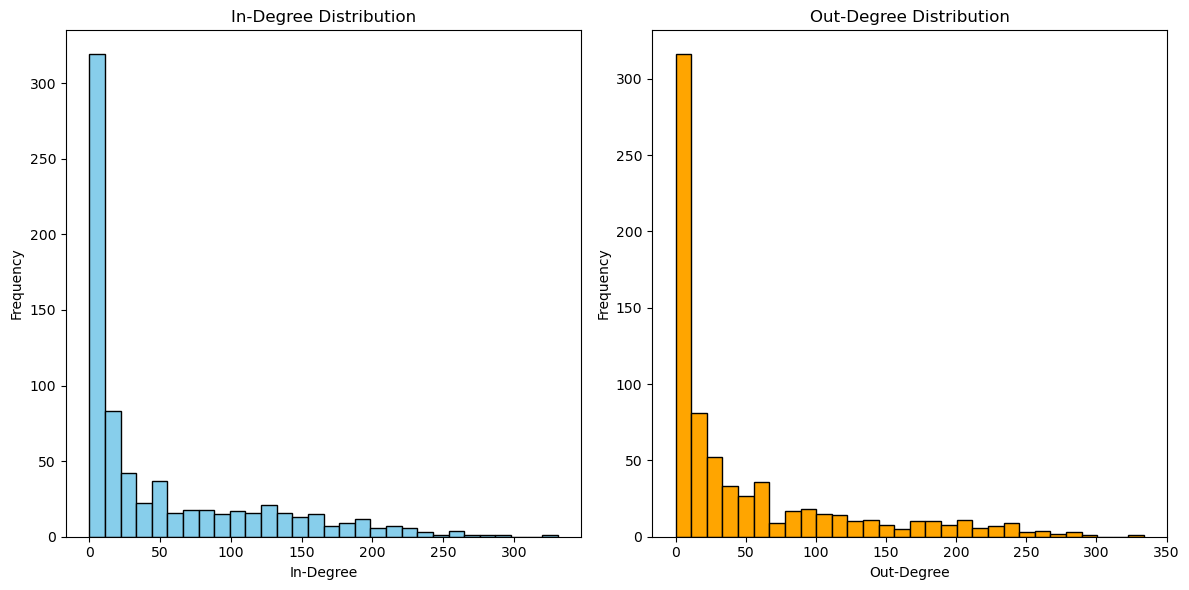

Graph Summary Report:
Number of airports (nodes): 727
Number of flights (edges): 36719
Graph Density: 0.1391
Graph Type: Dense

Identified Hubs (Airports with high degree):
   Node  In-Degree  Out-Degree  Total Degree
0   SHV        257         203           460
1   DAY        186         206           392
2   BDL        162         182           344
3   BWI        210         242           452
4   PHX        225         259           484
..  ...        ...         ...           ...
73  RDU        193         220           413
74  DFW        251         271           522
75  ELP        198         223           421
76  IAH        217         241           458
77  MIA        236         269           505

[78 rows x 4 columns]


In [5]:
summarize.summarize_graph_features(flight_network)

### 1.3 Deeper analysis

In [3]:
total_passengers = (df.groupby(['Origin_city', 'Destination_city'])['Passengers'].sum()
                    .reset_index().rename(columns={"Passengers": "Total_passengers"}))
total_passengers_df = total_passengers[['Origin_city', 'Destination_city', 'Total_passengers']]

In [4]:
total_passengers_df

,Origin_city,Destination_city,Total_passengers
0,"Aberdeen, SD","Anchorage, AK",2
1,"Aberdeen, SD","Billings, MT",100
2,"Aberdeen, SD","Bismarck, ND",67
3,"Aberdeen, SD","Brainerd, MN",32
4,"Aberdeen, SD","Eau Claire, WI",32
...,...,...,...
30326,"Yuma, AZ","Yuma, AZ",0
30327,"Zanesville, OH","Atlanta, GA",0
30328,"Zanesville, OH","Detroit, MI",0
30329,"Zanesville, OH","Kansas City, MO",0


In [5]:
# Sorting to find busiest routes by passengers flow
busiest_routes = total_passengers.sort_values(by='Total_passengers', ascending=False)
busiest_routes = busiest_routes.head(20)

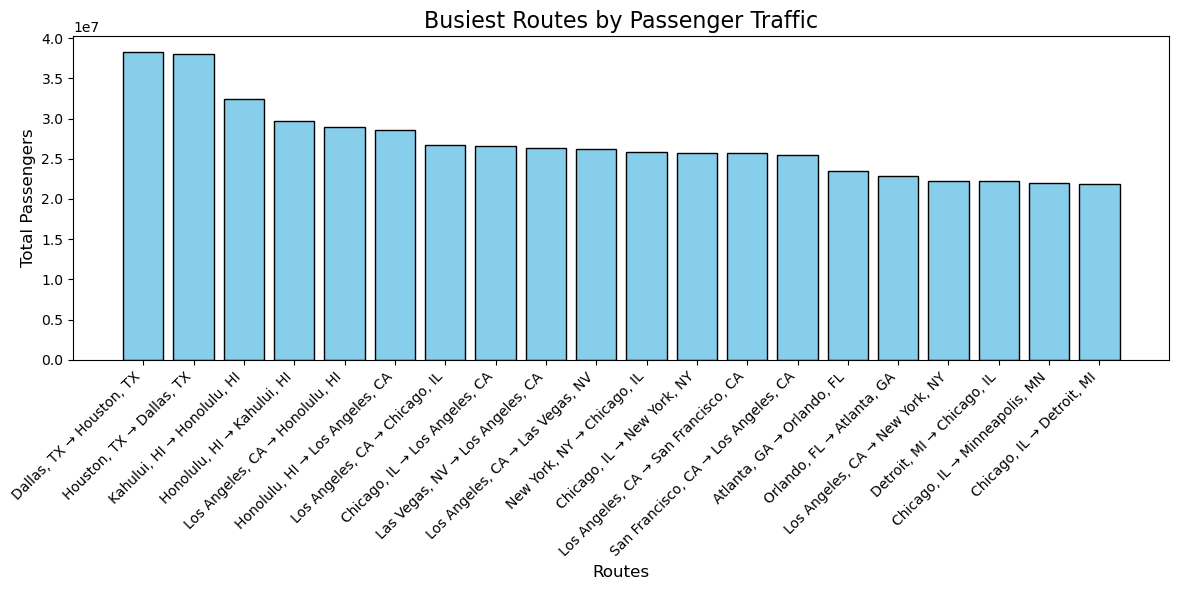

In [6]:
# Visualise the results
plt.figure(figsize=(12, 6))
plt.bar(
    busiest_routes["Origin_city"] + " → " + busiest_routes["Destination_city"],
    busiest_routes["Total_passengers"],
    color="skyblue",
    edgecolor="black"
)

plt.title("Busiest Routes by Passenger Traffic", fontsize=16)
plt.xlabel("Routes", fontsize=12)
plt.ylabel("Total Passengers", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
# Calculate the average passengers per flight for each route and highlight under/over-utilized connections.

# Add Total_flights column
total_flights_df = (
    df.groupby(["Origin_city", "Destination_city"])["Flights"]
    .sum()
    .reset_index()
    .rename(columns={"Flights": "Total_flights"})
)
total_flights_df = total_flights_df[['Origin_city', 'Destination_city', 'Total_flights']]

# Merge the two DataFrames
route_stats = pd.merge(total_passengers_df, total_flights_df, on=["Origin_city", "Destination_city"])

# Avoid division by 0 and null values and calculate the average passengers per flight
route_stats["Avg_pass_per_flight"] = np.where(
    (route_stats["Total_flights"] > 0) & (route_stats['Total_passengers'] > 0),
    (route_stats["Total_passengers"] / route_stats["Total_flights"]),
    0  
)

# Display the results
route_stats


,Origin_city,Destination_city,Total_passengers,Total_flights,Avg_pass_per_flight
0,"Aberdeen, SD","Anchorage, AK",2,1,2.0
1,"Aberdeen, SD","Billings, MT",100,1,100.0
2,"Aberdeen, SD","Bismarck, ND",67,2,33.5
3,"Aberdeen, SD","Brainerd, MN",32,1,32.0
4,"Aberdeen, SD","Eau Claire, WI",32,1,32.0
...,...,...,...,...,...
30326,"Yuma, AZ","Yuma, AZ",0,2,0.0
30327,"Zanesville, OH","Atlanta, GA",0,5,0.0
30328,"Zanesville, OH","Detroit, MI",0,3,0.0
30329,"Zanesville, OH","Kansas City, MO",0,1,0.0


In [ ]:
# Define thresholds for under-utilized and over-utilized connections
under_utilized_threshold = route_stats["Avg_pass_per_flight"].quantile(0.3)
over_utilized_threshold = route_stats["Avg_pass_per_flight"].quantile(0.7)

# Highlight under-utilized and over-utilized connections
route_stats["Utilization"] = pd.cut(
    route_stats["Avg_pass_per_flight"],
    bins=[-float("inf"), under_utilized_threshold, over_utilized_threshold, float("inf")],
    labels=["Under-Utilized", "Moderately Utilized", "Over-Utilized"]
)
route_stats

,Origin_city,Destination_city,Total_passengers,Total_flights,Avg_pass_per_flight,Utilization
0,"Aberdeen, SD","Anchorage, AK",2,1,2.0,Under-Utilized
1,"Aberdeen, SD","Billings, MT",100,1,100.0,Over-Utilized
2,"Aberdeen, SD","Bismarck, ND",67,2,33.5,Moderately Utilized
3,"Aberdeen, SD","Brainerd, MN",32,1,32.0,Moderately Utilized
4,"Aberdeen, SD","Eau Claire, WI",32,1,32.0,Moderately Utilized
...,...,...,...,...,...,...
30326,"Yuma, AZ","Yuma, AZ",0,2,0.0,Under-Utilized
30327,"Zanesville, OH","Atlanta, GA",0,5,0.0,Under-Utilized
30328,"Zanesville, OH","Detroit, MI",0,3,0.0,Under-Utilized
30329,"Zanesville, OH","Kansas City, MO",0,1,0.0,Under-Utilized


In [ ]:
### Missing geomap

### 1.4 Report

### 1.5 Questions to address